# Black Friday Sales Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')# Ignoring warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-data/train.csv


In [2]:
bfs=pd.read_csv("/kaggle/input/black-friday-sales-data/train.csv")

In [3]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Reading information about data

In [4]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
bfs.duplicated().value_counts()

False    550068
Name: count, dtype: int64

We have a total of 550068 rows of data, including NaN values with no duplicated data. So, the first task is to convert the given data into useful data.

In [7]:
bfs.rename(columns=str.lower,inplace=True) #Convertig all the columns name in the lowercase for easy use.

In [8]:
bfs.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

## Procecssing each column Individually

### user_id: 

It is nothing but a unique customer ID.

In [9]:
bfs.user_id

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64

### gender: 

The column contains gender information with ['M','F'] values.

In [10]:
bfs.gender.unique()

array(['F', 'M'], dtype=object)

In [11]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


### age:

Column contains age category of customers.

In [12]:
bfs.age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

We have a total of 7 age category customer data.

'0-17', '18-25', '26-35', '36-45', '46-50', '51-55', and '55+'.

### occupation:

Contains occupation information of customers in the form of masked value format.

In [13]:
bfs.occupation.unique(),len(bfs.occupation.unique()),bfs.occupation.dtype

(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6]),
 21,
 dtype('int64'))

We have 21 types of occupations for customers 

### city_category

Contains information of cities category wise 

In [14]:
bfs.city_category.unique()

array(['A', 'C', 'B'], dtype=object)

### stay_in_current_city_years:

Contains the total number of years, indicating that the information of customers who belong to the current city.

In [15]:
bfs.stay_in_current_city_years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We have customers who are staying in the city from '0', '1', '2', '3', and '4+' years.

We  can replace '4+' years with '4' so we can get the exact number, and we can assume that those customers who have been in the current city for 4 years are staying more than 4 years in the current city.

In [16]:
bfs.stay_in_current_city_years=bfs.stay_in_current_city_years.replace("4+",'4').astype(int)
bfs.stay_in_current_city_years.unique()

array([2, 4, 3, 1, 0])

Here, we got 0, 1, 2, 3, and 4 years, which are integer values.

### marital_status:

Contains information of customers that they are married or not. 

In [17]:
bfs.marital_status.unique()

array([0, 1])

We assume that **0** means the customer's marital status is **single** and **1** means the customer is **married**. 

### product_category:

Contains category wise product value.

In [18]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


We have three product category columns, product_category_1, product_category_2, and product_category_3 which are nothing but the different varieties of products.

Ex.:

We can assume that **product_category_1 has Electronics items**, **product_category_2 has Cloths & Grarments**, **product_category_3 has Grocery**.

In [19]:
bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


Notice that product category having NaN values or empty values. Let's try to fill them by seeing the other column's info.

In [20]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


See we have two columns: gender and occupation. By seeing these two columns, we can analyze which column is giving us useful values to fill the NaN values of product categories.

Ex.:

* By seeing the '**age**' column, we can analyze which product category is mostly used by the particular age of customer, and we can fill that category value in place of nan values.
* By seeing the '**occupation**' column, we can analyze which product category is mostly used by the particular customers, depending on their occupation, and we can fill that category value in place of NaN values.

In the next steps, let's see which column is giving us the most useful values.

In [21]:
a=bfs.groupby('age')['product_category_2'].agg(pd.Series.mode)
b=bfs.groupby('age')['product_category_3'].agg(pd.Series.mode)
c=bfs.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d=bfs.groupby('occupation')['product_category_3'].agg(pd.Series.mode)# mode gives us a most repeated value

In [22]:
c=bfs.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
a

age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: product_category_2, dtype: float64

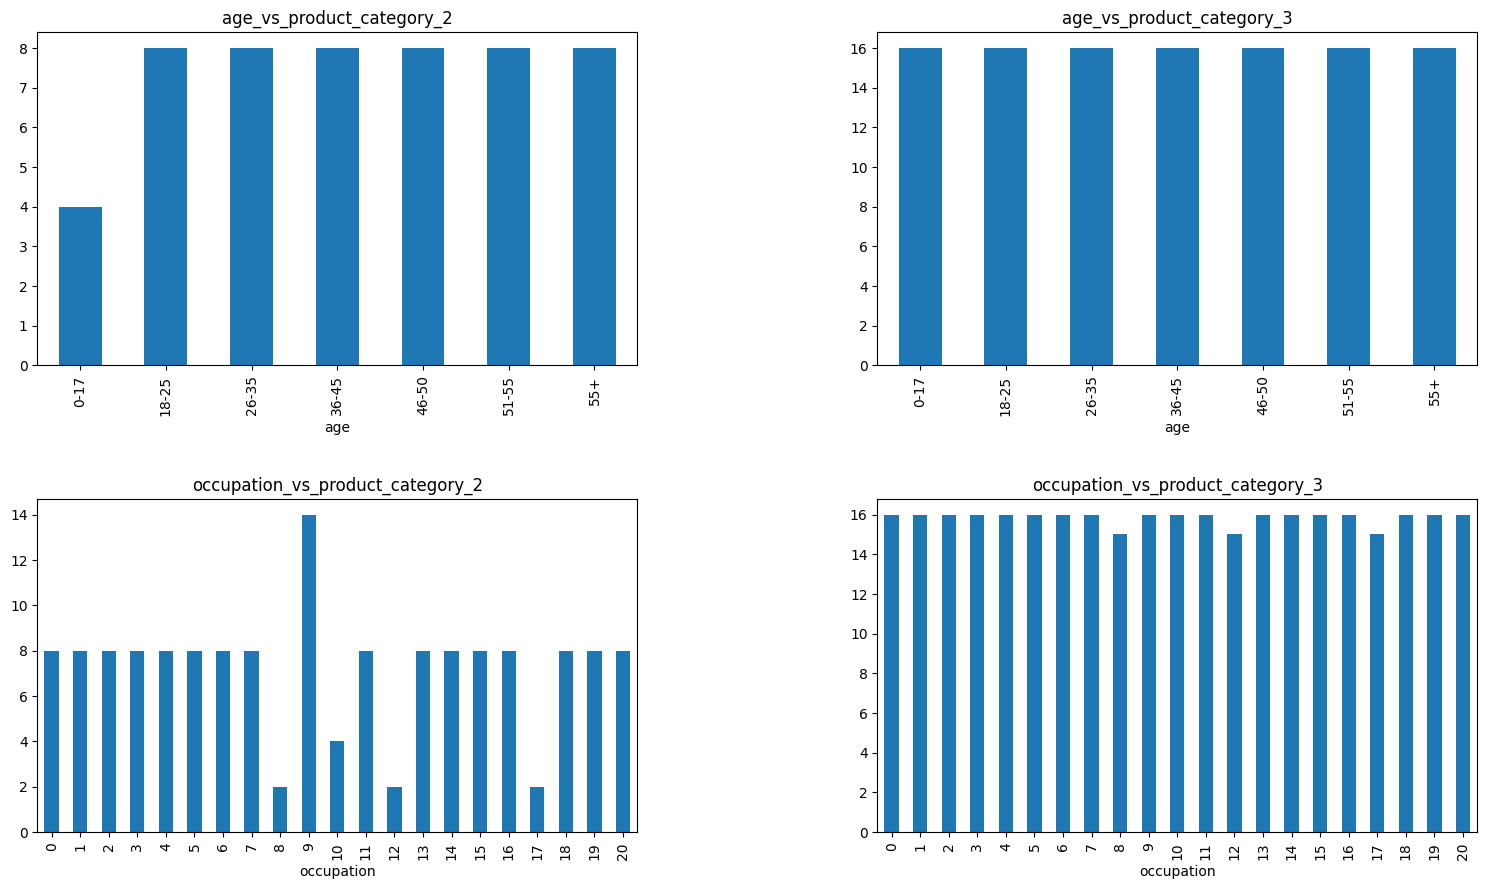

In [23]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar',title="occupation_vs_product_category_3")
plt.show()

# here we trying to fill only product_category_2 and product_category_3 NaN values because product_category_1 having 0 NaN values.

By comparing both the '**age**' and '**occupation**' columns, we can see that **on the basis of occupation, we are getting more and different product categories, which are mostly repeated.** 

So, **we can fill the nan product_category values corresponding to customer occupation.**

In the next step to fill these NaN values, let's try to write a function that we can use for each product_category.

* Instead of repeating the code for each product_category, we can use the code reusability concept here.

In [24]:
def fill_nan_category(category_colunm):
    x=bfs.groupby('occupation')[category_colunm].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        bfs.loc[bfs['occupation']==i,category_colunm]=bfs.loc[bfs['occupation']==i,category_colunm].fillna(j)

In [25]:
fill_nan_category('product_category_1')
fill_nan_category('product_category_2')
fill_nan_category('product_category_3')
bfs.product_category_1=bfs.product_category_1.astype(float)

In [26]:
bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  float64
 1   product_category_2  550068 non-null  float64
 2   product_category_3  550068 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB


Here, see we successfully filled the NaN values with proper data. 
##### **In this concept, I hope you understood how we can fill the NaN values by analysing and comparing corresponding columns. And where we can use the code reusability concept.**

### Purchase:

Contains the purchase value for the product by the customer.

In [27]:
bfs.purchase.unique(),bfs.purchase.isnull().count()

(array([ 8370, 15200,  1422, ...,   135,   123,   613]), 550068)

In [28]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  int64  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  float64
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 50.4+ MB


In [29]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


In [30]:
bfs.to_csv('./bfs_clean_data.csv') # Saivng cleaned dataset in output directory.

Therefore, we cleaned our data successfully without losing a single value; we got a total of 550068 values.

If you have more cleaning ideas on this dataset, place them in comments or in the discussion.

## Data Visualization

In [31]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


### 1) Check Distribution and Outliers of 'purchase'

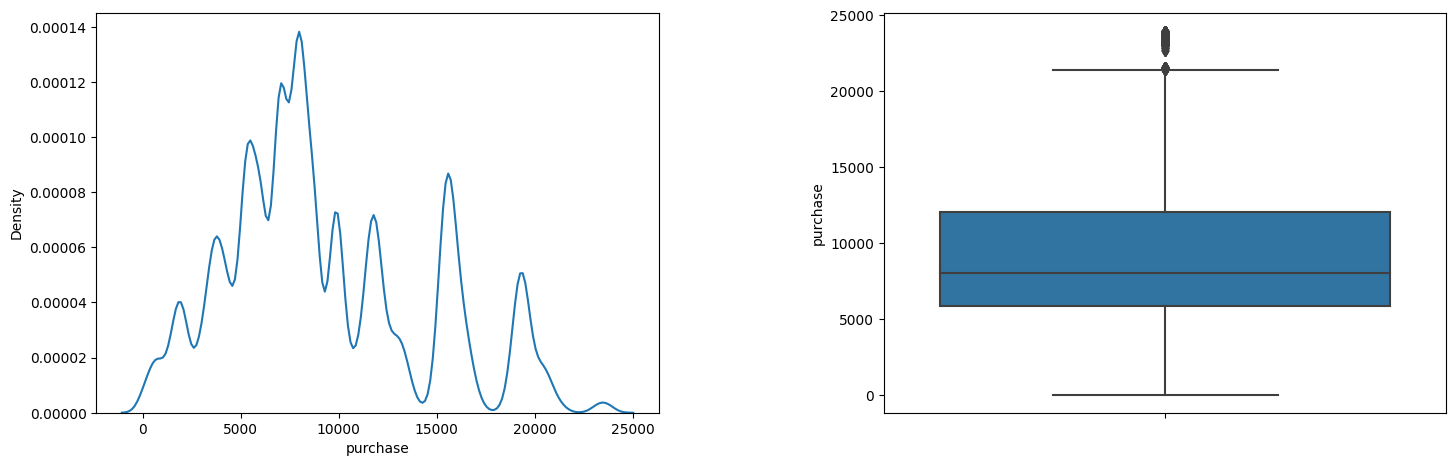

In [32]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=bfs)
plt.subplot(1,2,2)
sns.boxplot(y='purchase',data=bfs)
plt.show()

We observed that most of the purchase value is between 5000 and 10000.  

## Get purchase details of Male and Female customers? {'M','F'}.

#### 2) Find which kind of customer visits more frequently. Male or Female? {'M','F'}.

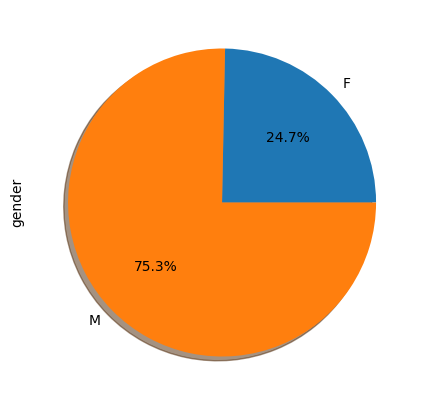

In [33]:
bfs.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

We see that 75% of male customers visit us frequently.

#### 3) Purchase Distribution of 'Male' and 'Female' Customers.

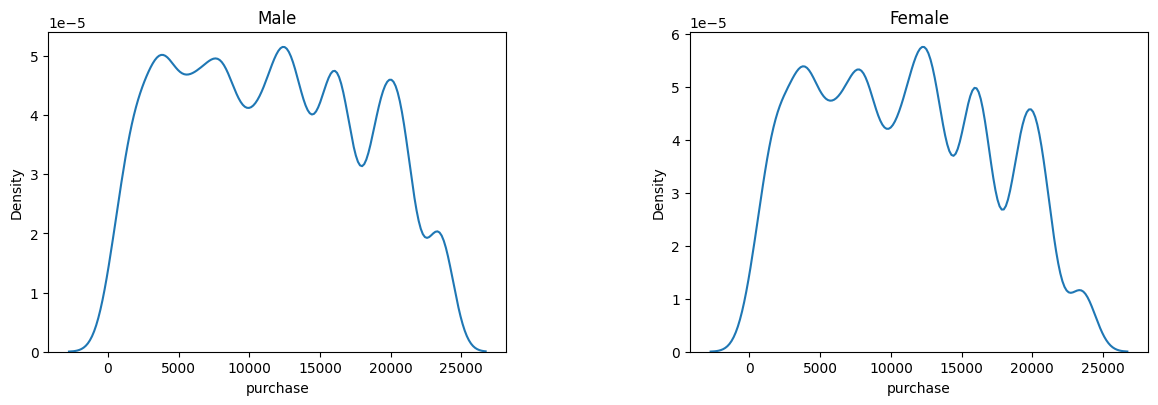

In [34]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
ma=bfs[bfs['gender']=='M'].value_counts('purchase').reset_index()
fe=bfs[bfs['gender']=='F'].value_counts('purchase').to_frame()
plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=ma).set_title('Male')
plt.subplot(1,2,2)
sns.kdeplot(x='purchase',data=fe).set_title('Female')
plt.show()

#### 4) Find which kind of customer is purchasing more. Male or Female? {'M','F'}.

,gender,purchase
0,F,1186232642
1,M,3909580100


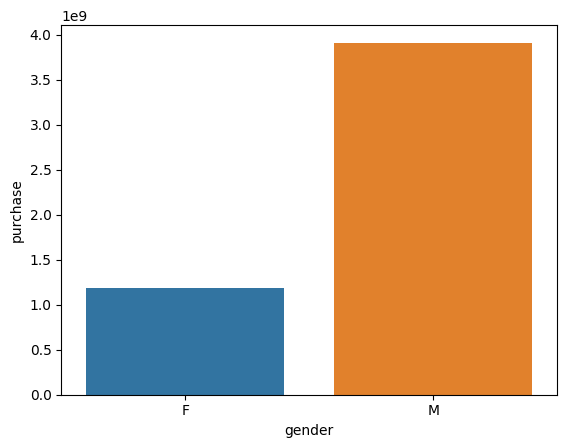

In [35]:
p=bfs.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender',y='purchase',data=p)
p

We observed that 'Male' customers are purchasing more.

#### 5) Find which product customers are buying most by seeing product_id.

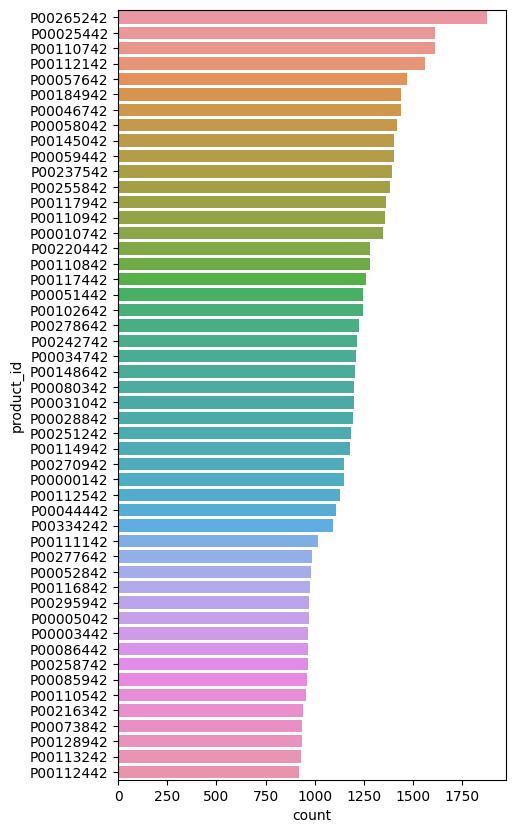

In [36]:
p_id=bfs.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

Here are the 'top 50' product_id's that customers are buying the most.

#### 6) Find 'sub_product' which is selling the most from each product_category and which customer category is buying that product the most? {'M','F'}.

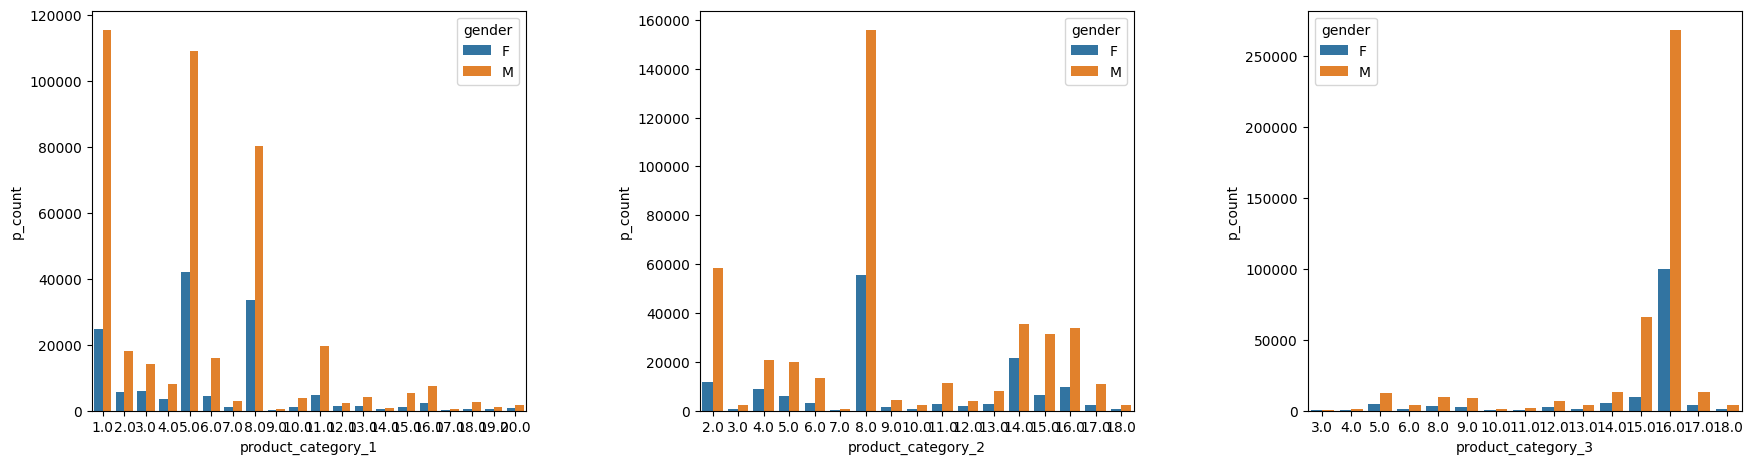

In [37]:
c1 = bfs.groupby('gender')['product_category_1'].value_counts().reset_index(name='p_count')
c2 = bfs.groupby('gender')['product_category_2'].value_counts().reset_index(name='p_count')
c3 = bfs.groupby('gender')['product_category_3'].value_counts().reset_index(name='p_count')

plt.figure(figsize=(15, 5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

plt.subplot(1, 3, 1)
sns.barplot(x='product_category_1', y='p_count', hue='gender', data=c1)

plt.subplot(1, 3, 2)
sns.barplot(x='product_category_2', y='p_count', hue='gender', data=c2)

plt.subplot(1, 3, 3)
sns.barplot(x='product_category_3', y='p_count', hue='gender', data=c3)

plt.show()

Here we can see we have three product_categories and on the x-axis we have some values that are nothing but sub_products of that product_category in masked format.

The graph shows that the sub_product count and the two color bars are showing the customer category count, which is buying that product.

We observed that there are some sub_product's selling count is high and most of the 'Male' customers are buying that product.

## Get purchase details of 'Married' and 'UnMarried' customers. {'UnMarried': 0, 'Married': 1}

#### 7) Purchase Distribution of Married and UnMarried Customers.

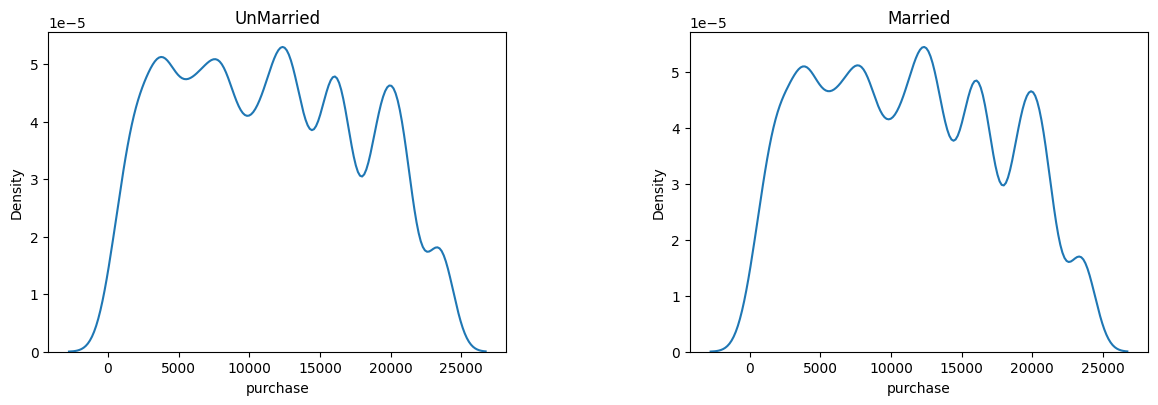

In [38]:
UM_P=bfs[bfs['marital_status']==0].value_counts('purchase').to_frame()
M_P=bfs[bfs['marital_status']==1].value_counts('purchase').to_frame()
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=UM_P).set_title('UnMarried')
plt.subplot(1,2,2)
sns.kdeplot(x='purchase',data=M_P).set_title('Married')
plt.show()

Purchase distribution of both 'Married' and 'UnMarried' customers is quite the same.

#### 8) Find which customer visits more frequently ? UnMarried or Married? {'UnMarried': 0, 'Married': 1}.

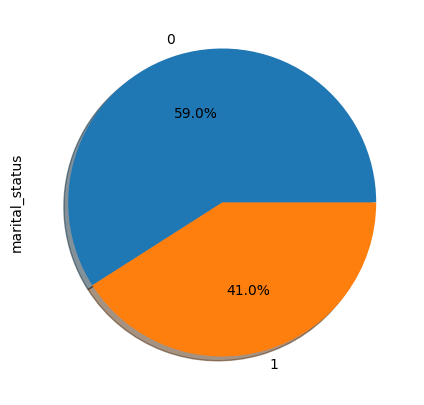

In [39]:
bfs.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

We observed that 'UnMarried' customers were visiting us frequently. And we have 'Married' customer in large amount as well.

#### 9) Find which customer is purchasing more (Married or UnMarried) and Top 10 products purchased by them.

In [40]:
bfs.head(1)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370


,gender,marital_status,purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


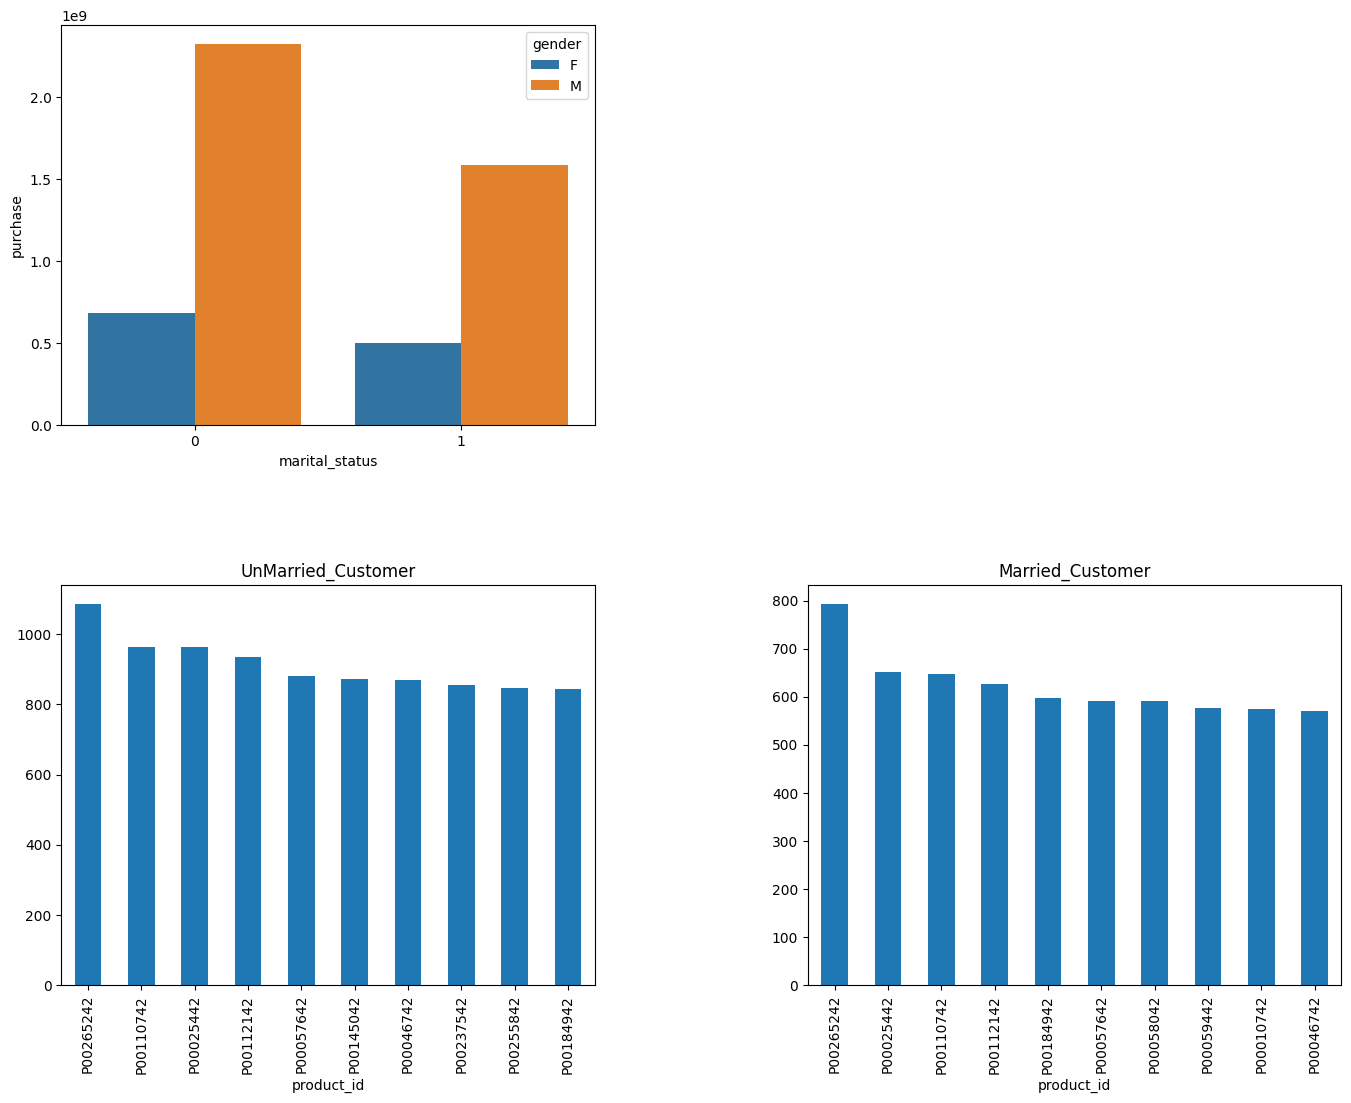

In [41]:
M_UM_P=bfs.groupby(['gender','marital_status']).agg({'purchase':sum}).reset_index()
UM=bfs[bfs['marital_status']==0].value_counts('product_id').nlargest(10)
M=bfs[bfs['marital_status']==1].value_counts('product_id').nlargest(10)
plt.subplots_adjust(left=1,
                    bottom=1,
                    right=3,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
sns.barplot(x='marital_status',y='purchase',hue='gender',data=M_UM_P)
plt.subplot(2,2,3)
UM.plot(x=UM.index,y=UM,kind='bar',title='UnMarried_Customer')
plt.subplot(2,2,4)
M.plot(x=M.index,y=M,kind='bar',title='Married_Customer')
M_UM_P

In the above plot, we can see that 'UnMarried' customers are purchasing more than the 'Married' customers.

And BarPlot showing the top 10 Product Id's purchased by them frequently.

## Conclusion: